Unsupervised Image Clustering

Dataset used: CIFAR-10 Dataset using the MiniBatchKMeans algorithm from scikit-learn.
The objective is to group 50,000 images into 10 clusters based solely on their pixel patterns, without using the original labels during training.

This method only clustering CIFAR-10 images based on raw pixels.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.cluster import MiniBatchKMeans

In [11]:
from keras.datasets import cifar10

imports the CIFAR-10 dataset, which contains 60,000 32x32 color images.

In [12]:
# 1. Load Data
# We specifically ignore the labels 'y' by using the '_' placeholder
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

1. Flattening: The 3D image structure (32, 32, 3) is converted into a 1D vector of 3,072 pixels (32 * 32 * 3) so it can be processed by standard clustering algorithms.
2. Normalization: Pixel values (0-255) are scaled to a 0-1 range to prevent large values from disproportionately affecting distance calculations.

In [13]:
# 2. Pre-processing for Clustering
# Flatten the 3D images (32x32x3) into 1D vectors of 3072 pixels
# Normalize to 0-1 range to ensure large pixel values don't dominate distance calculations
x_train_flat = x_train.reshape(len(x_train), -1).astype('float32') / 255.0
x_test_flat = x_test.reshape(len(x_test), -1).astype('float32') / 255.0

Use MiniBatchKMeans because it is computationally faster and more memory-efficient for large datasets like CIFAR-10. It processes the data in small, random "batches" (size 2,048) to update cluster centers, rather than calculating the entire 50,000-image dataset at once. 

Automatically selects the number of random initializations based on the initialization method used.

In [14]:
# 3. Model Implementation
# MiniBatchKMeans is the 2026 standard for large datasets because it is 
# significantly faster than standard KMeans while maintaining accuracy.
n_clusters = 10
kmeans = MiniBatchKMeans(
    n_clusters=n_clusters, 
    batch_size=2048, 
    random_state=42, 
    n_init='auto' # Modern scikit-learn default for 2026
)

In [15]:
# 4. Training (Fitting)
# The model "learns" by finding the center points of 10 different groups
print("Clustering 50,000 images... this may take a moment.")
kmeans.fit(x_train_flat)

Clustering 50,000 images... this may take a moment.


,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.",10
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:'k-means++' : selects initial cluster centroids using sampling based onan empirical probability distribution of the points' contribution to theoverall inertia. This technique speeds up convergence. The algorithmimplemented is ""greedy k-means++"". It differs from the vanilla k-means++by making several trials at each sampling step and choosing the best centroidamong them.'random': choose `n_clusters` observations (rows) at random from datafor the initial centroids.If an array is passed, it should be of shape (n_clusters, n_features)and gives the initial centers.If a callable is passed, it should take arguments X, n_clusters and arandom state and return an initialization.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"max_iter max_iter: int, default=100Maximum number of iterations over the complete dataset beforestopping independently of any early stopping criterion heuristics.",100
,"batch_size batch_size: int, default=1024Size of the mini batches.For faster computations, you can set `batch_size > 256 * number_of_cores`to enable :ref:`parallelism `on all cores... versionchanged:: 1.0 `batch_size` default changed from 100 to 1024.",2048
,"verbose verbose: int, default=0Verbosity mode.",0
,"compute_labels compute_labels: bool, default=TrueCompute label assignment and inertia for the complete datasetonce the minibatch optimization has converged in fit.",True
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization andrandom reassignment. Use an int to make the randomness deterministic.See :term:`Glossary `.",42
,"tol tol: float, default=0.0Control early stopping based on the relative center changes asmeasured by a smoothed, variance-normalized of the mean centersquared position changes. This early stopping heuristics iscloser to the one used for the batch variant of the algorithmsbut induces a slight computational and memory overhead over theinertia heuristic.To disable convergence detection based on normalized centerchange, set tol to 0.0 (default).",0.0
,"max_no_improvement max_no_improvement: int, default=10Control early stopping based on the consecutive number of minibatches that does not yield an improvement on the smoothed inertia.To disable convergence detection based on inertia, setmax_no_improvement to None.",10
,"init_size init_size: int, default=NoneNumber of samples to randomly sample for speeding up theinitialization (sometimes at the expense of accuracy): theonly algorithm is initialized by running a batch KMeans on arandom subset of the data. This needs to be larger than n_clusters.If `None`, the heuristic is `init_size = 3 * batch_size` if`3 * batch_size < n_clusters`, else `init_size = 3 * n_clusters`.",None
,"n_init n_init: 'auto' or int, default=""auto""Number of random initializations that are tried.In contrast to KMeans, the algorithm is only run once, using the best ofthe `n_init` initializations as measured by inertia. Several runs arerecommended for sparse high-dimensional problems (see:ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:3 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'` in version.",'auto'


Visualizes the "center" of each cluster. These are essentially the average images of all pictures assigned to that group. It shows blurry shapes resembling the colors and silhouettes typical of certain classes.

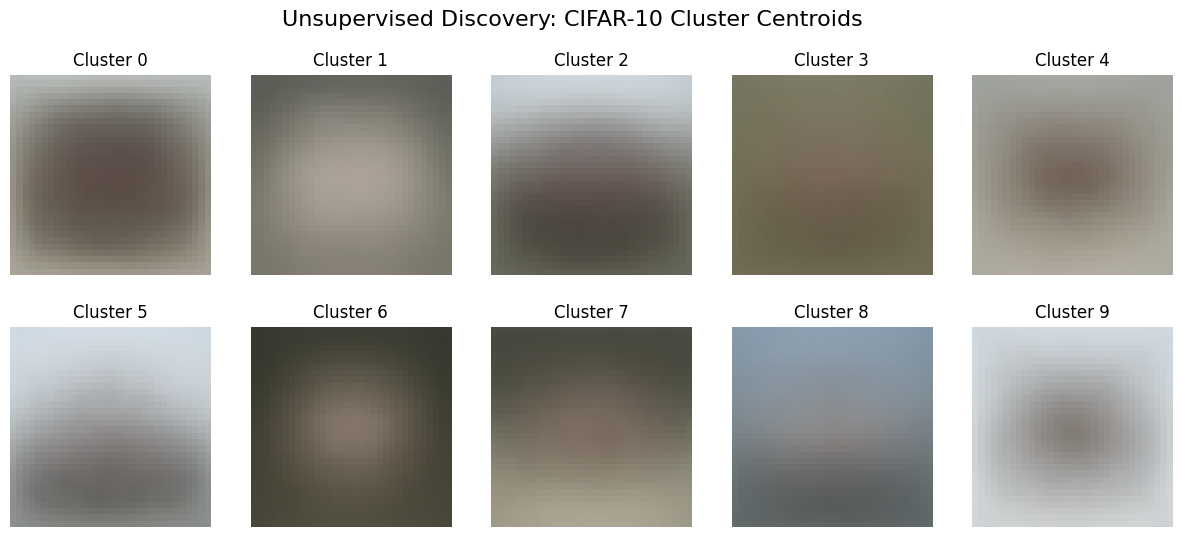

In [16]:
# 5. Visualization of Discovered Clusters
# Each "centroid" is the average of all images assigned to that cluster.
plt.figure(figsize=(15, 6))
for i in range(n_clusters):
    plt.subplot(2, 5, i + 1)
    # Reshape the 3072 vector back into a 32x32x3 image for viewing
    centroid_img = kmeans.cluster_centers_[i].reshape(32, 32, 3)
    plt.imshow(centroid_img)
    plt.title(f"Cluster {i}")
    plt.axis('off')

plt.suptitle("Unsupervised Discovery: CIFAR-10 Cluster Centroids", fontsize=16)
plt.show()

In [ ]:
# 6. Prediction Example
# Assign a new image from the test set to one of the discovered clusters
sample_idx = 0
predicted_cluster = kmeans.predict(x_test_flat[sample_idx:sample_idx+1])[0]
print(f"Test Image {sample_idx} has been assigned to: Cluster {predicted_cluster}")

Test Image 0 has been assigned to: Cluster 3


Heatmap compares the unsupervised clusters to actual labels (plane, car, bird, etc.). This reveals which actual classes the algorithm naturally grouped together.

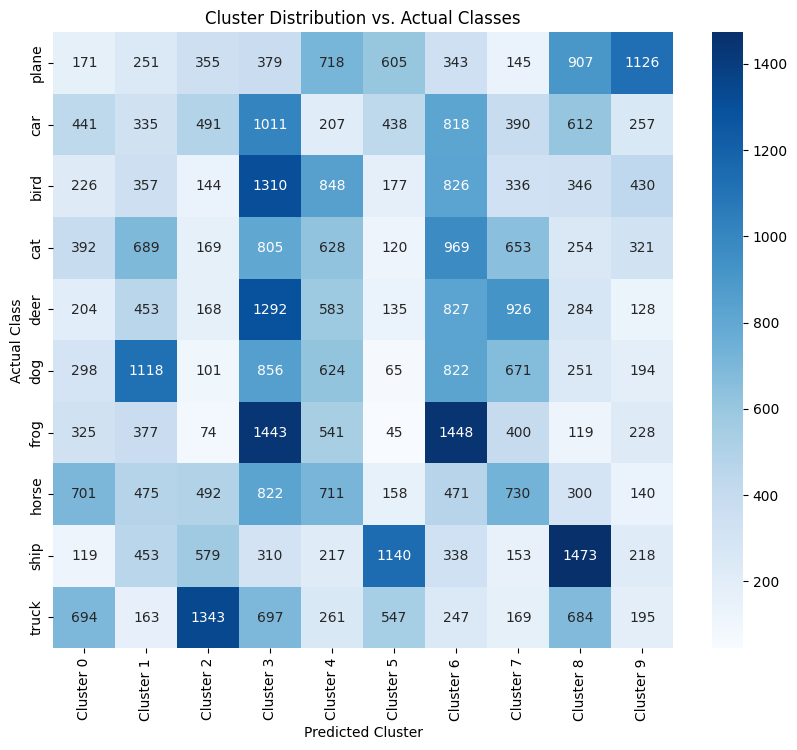

In [18]:
# 7. Evaluation: Mapping Clusters to Real Classes
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Flatten the labels for indexing
y_train_labels = y_train.flatten()

# Step A: Identify what each cluster "actually" represents
# We look at the most frequent ground-truth label in each cluster
cluster_to_label_map = {}
for i in range(n_clusters):
    # Get indices of all images assigned to cluster i
    mask = (kmeans.labels_ == i)
    # Find the most frequent ground-truth label in this group
    counts = np.bincount(y_train_labels[mask])
    if len(counts) > 0:
        cluster_to_label_map[i] = counts.argmax()

# Step B: Create a Confusion Matrix
# This shows how many images of each real class ended up in each cluster
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cm = confusion_matrix(y_train_labels, kmeans.labels_)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Cluster {i}" for i in range(10)],
            yticklabels=class_names)
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Class')
plt.title('Cluster Distribution vs. Actual Classes')
plt.show()

In [19]:
# Calculate the percentage of images correctly clustered
correct_predictions = 0
for i in range(n_clusters):
    # Find the most frequent class in this cluster
    mask = (kmeans.labels_ == i)
    counts = np.bincount(y_train_labels[mask])
    if len(counts) > 0:
        correct_predictions += counts.max()

total_accuracy = (correct_predictions / len(y_train_labels)) * 100
print(f"Overall Clustering Accuracy: {total_accuracy:.2f}%")

Overall Clustering Accuracy: 23.13%


K-means algorithm measures simple physical distance between pixel values, which captures color and lighting but fails to understand complex shapes or objects.

With 3,072 dimensions (pixels), the "curse of dimensionality" makes it hard for simple Euclidean distance to distinguish a "cat" from a "dog."

To increase the accuracy, we can use Feature Extraction and Clustering. In its raw form, the CIFAR-10 dataset consists of 32×32 pixel images. To a computer, a raw image is just a messy grid of numbers where a single-pixel shift can change the entire mathematical representation of the data.

Feature extraction and clustering make the "accuracy" higher because they transform raw data into semantic information.

Feature Extraction and Clustering can be seen in the next notebook